In [1]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload the dataset -> code from https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./raw_data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


 - CRIM - per capita crime rate by town
 - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS - proportion of non-retail business acres per town.
 - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 - NOX - nitric oxides concentration (parts per 10 million)
 - RM - average number of rooms per dwelling
 - AGE - proportion of owner-occupied units built prior to 1940
 - DIS - weighted distances to five Boston employment centres
 - RAD - index of accessibility to radial highways
 - TAX - full-value property-tax rate per $10,000
 - PTRATIO - pupil-teacher ratio by town
 - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT - % lower status of the population
 - MEDV - Median value of owner-occupied homes in \$1000's

# Data analysis

In [3]:
df.shape

(506, 14)

In [4]:
df.duplicated().sum()

0

In [5]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Data visualization

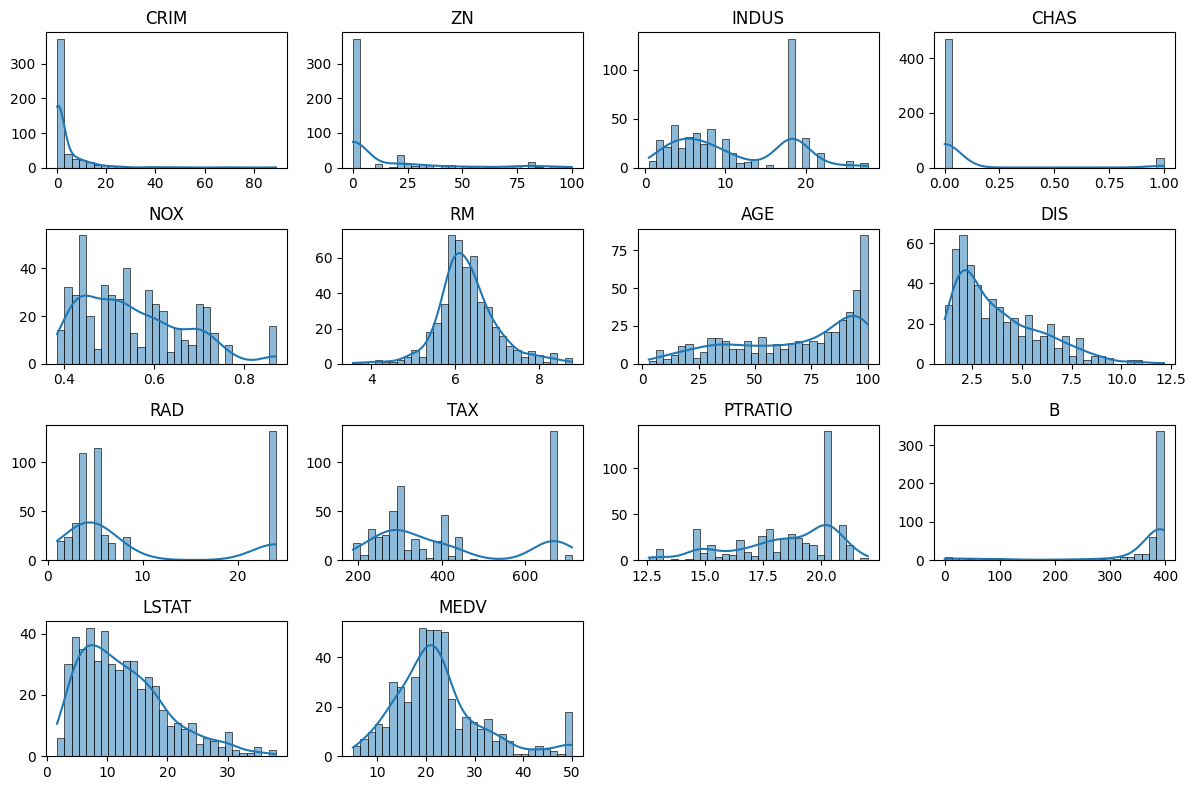

In [10]:
plt.figure(figsize=(12, 8))

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Iterate through each feature and plot its distribution in a subplot
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

The features CRIM, ZN, CHAS and B are heavily skewed. RM and MEDV (target) seem to be normally distributed

In our target MEDV, values > 50 (50.000) were attributed the value 50, so these values may not be useful to predict the final evaluation 

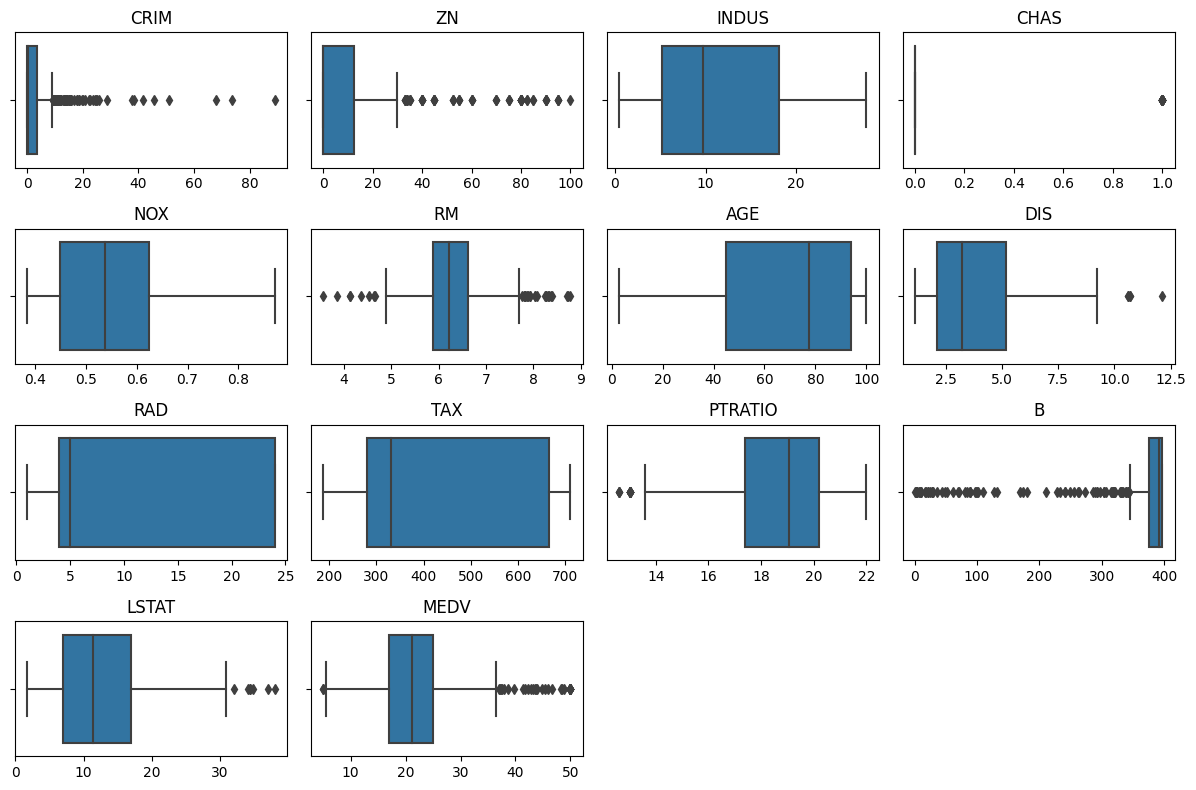

In [11]:
plt.figure(figsize=(12, 8))

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Iterate through each feature and plot its distribution in a subplot
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=column, data=df)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
def calculate_outlier_percentage(df):
    """
    Calculate the percentage of outliers in each feature of the DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the features.

    Returns:
        pd.Series: A Series with the percentage of outliers for each feature.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3) for each feature
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    # Calculate the interquartile range (IQR) for each feature
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count the number of outliers for each feature
    num_outliers = ((df < lower_bound) | (df > upper_bound)).sum()

    # Calculate the percentage of outliers for each feature
    total_data_points = df.shape[0]
    percentage_outliers = (num_outliers / total_data_points) * 100

    return percentage_outliers.sort_values(ascending=False)

In [13]:
calculate_outlier_percentage(df)

B          15.217391
ZN         13.438735
CRIM       13.043478
MEDV        7.905138
CHAS        6.916996
RM          5.928854
PTRATIO     2.964427
LSTAT       1.383399
DIS         0.988142
INDUS       0.000000
NOX         0.000000
AGE         0.000000
RAD         0.000000
TAX         0.000000
dtype: float64

In [14]:
df.shape

(506, 14)

In [15]:
df[df['MEDV'] == 50]['MEDV'].count()

16

Let's drop MEDV values equal to 50 (50.000)

In [16]:
df = df[df['MEDV'] != 50]
df.shape

(490, 14)

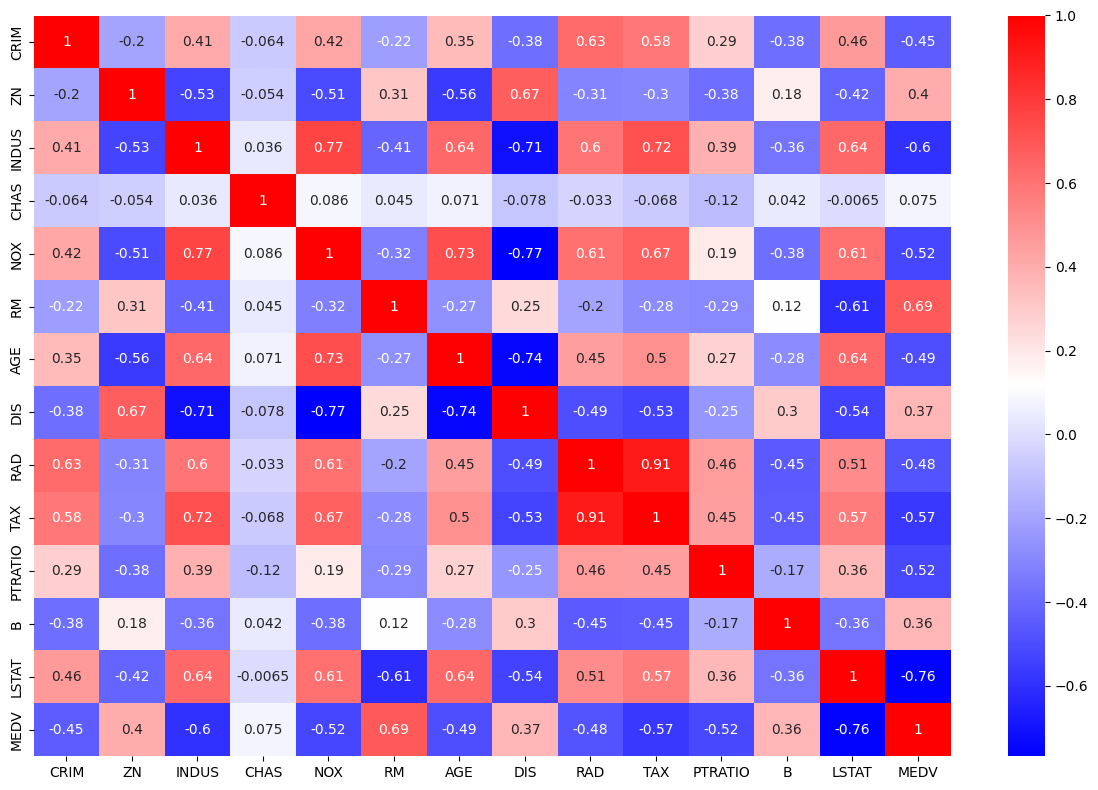

In [17]:
# Heatmap of pairwise correlations
correlation_matrix = df.corr()
column_names = correlation_matrix.columns
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr", annot=True)
plt.tight_layout()
plt.show()

In [18]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
121,RAD,TAX,0.909000,0.909000
134,TAX,RAD,0.909000,0.909000
102,DIS,NOX,-0.768122,0.768122
63,NOX,DIS,-0.768122,0.768122
32,INDUS,NOX,0.765155,0.765155
58,NOX,INDUS,0.765155,0.765155
181,LSTAT,MEDV,-0.759837,0.759837
194,MEDV,LSTAT,-0.759837,0.759837
91,AGE,DIS,-0.743043,0.743043
104,DIS,AGE,-0.743043,0.743043


Let's plot the top 6 most correlated (>0.5) features with MEDV

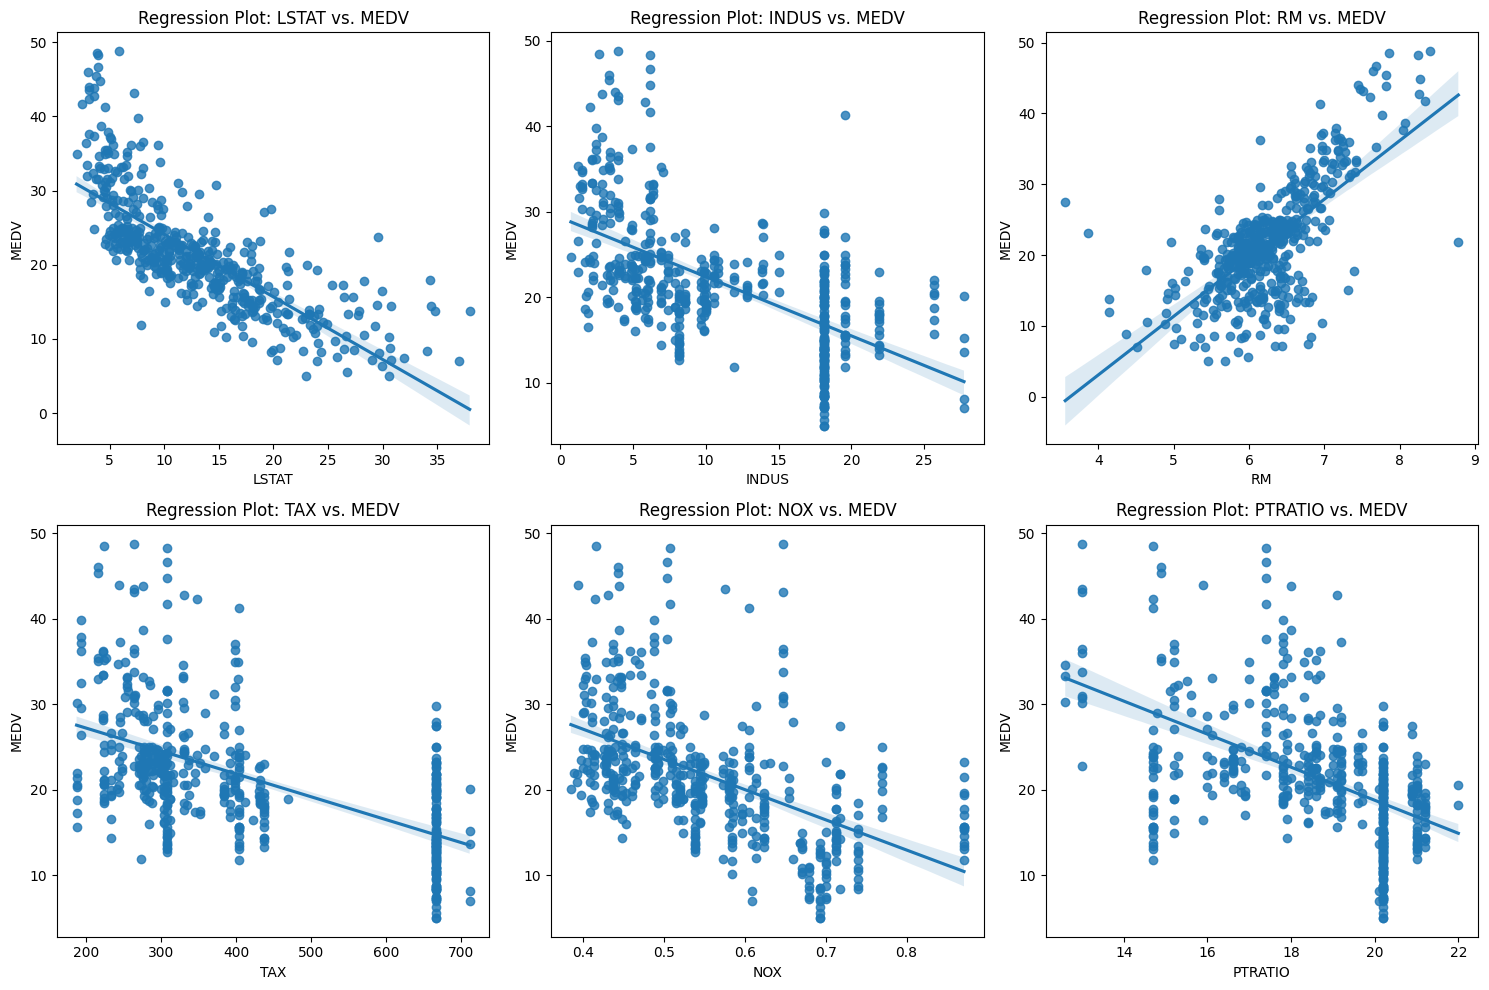

In [25]:
from sklearn.preprocessing import MinMaxScaler

corr_feat = ['LSTAT', 'INDUS', 'RM', 'TAX', 'NOX', 'PTRATIO']

X = df[corr_feat]

y = df['MEDV']

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, feature in enumerate(corr_feat):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=y, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Regression Plot: {feature} vs. MEDV')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('MEDV')

plt.tight_layout()
plt.show()

Check the distribution of the 6 features

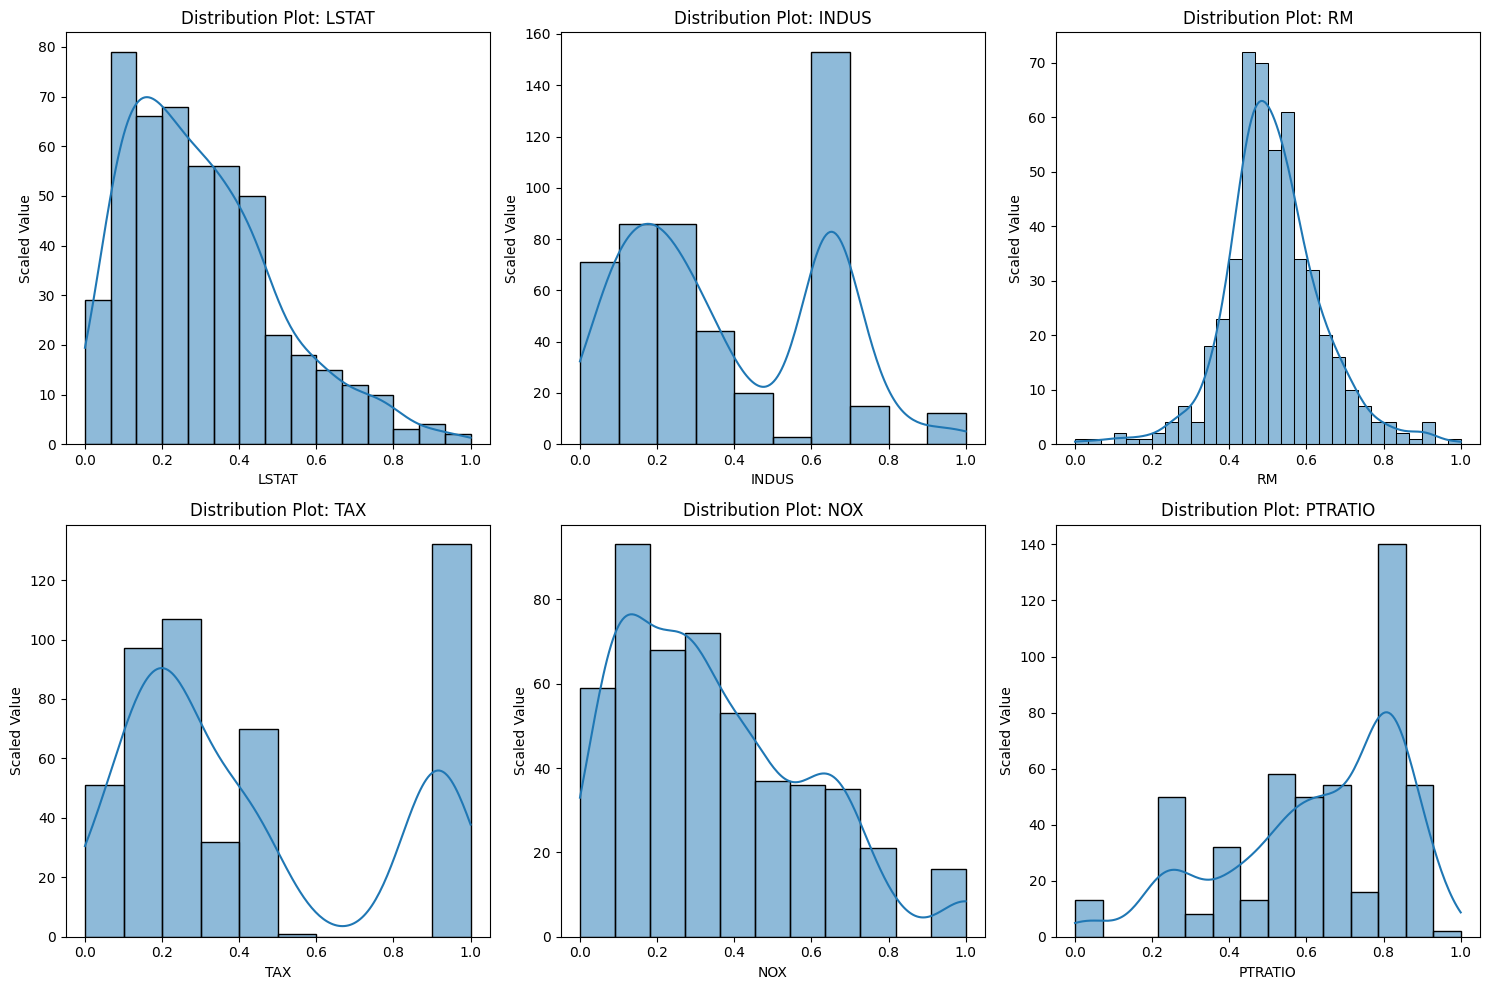

In [26]:
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate through each feature and plot its distribution
for i, feature in enumerate(corr_feat):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=X, x=feature, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution Plot: {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Scaled Value')  # Indicate the data has been scaled

plt.tight_layout()
plt.show()